In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext watermark
%watermark -u -n -t -z
%watermark -v -m -p numpy,pandas,matplotlib

last updated: Wed Mar 06 2019 10:31:14 CET
CPython 3.6.5
IPython 6.3.1

numpy 1.14.3
pandas 0.22.0
matplotlib 2.2.2

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)
system     : Darwin
release    : 18.5.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [3]:
with open('stores.json', 'r') as r:
    k = json.load(r)
df = pd.DataFrame(k['body']['items'])

In [4]:
df.head(3)

,adongCd,adongNm,bizesId,bizesNm,bldMngNo,bldMnno,bldNm,bldSlno,brchNm,ctprvnCd,...,lon,newZipcd,oldZipcd,plotSctCd,plotSctNm,rdnm,rdnmAdr,rdnmCd,signguCd,signguNm
0,2771031000,가창면,10027626,장모님치킨가창점,2771031024101200004036858,6,,,가창점,27,...,128.644459,42938,711861,1,대지,대구광역시 달성군 가창면 가창동로,대구광역시 달성군 가창면 가창동로 6,277103148001,27710,달성군
1,2729062500,상인2동,10048463,정통숯불바베큐치킨상인점,2729011500114280014013938,46,,,상인점,27,...,128.536144,42791,704370,1,대지,대구광역시 달서구 상원로,대구광역시 달서구 상원로 46,272903147008,27290,달서구
2,4125056500,불현동,10098244,짱구피자치킨,4125010300102680011008557,30,,,,41,...,127.065903,11320,483030,1,대지,경기도 동두천시 못골로,경기도 동두천시 못골로 30,412503189006,41250,동두천시


In [5]:
df.iloc[150]

adongCd                      4518051000
adongNm                             수성동
bizesId                        11707011
bizesNm                      BHC치킨정읍수성점
bldMngNo      4518010100109180004025584
bldMnno                              26
bldNm                             제일아파트
bldSlno                                
brchNm                            정읍수성점
ctprvnCd                             45
ctprvnNm                           전라북도
dongNo                                 
flrNo                                 1
hoNo                                   
indsLclsCd                            Q
indsLclsNm                           음식
indsMclsCd                          Q05
indsMclsNm                       닭/오리요리
indsSclsCd                       Q05A08
indsSclsNm                    후라이드/양념치킨
ksicCd                           I56193
ksicNm                           치킨 전문점
lat                             35.5833
ldongCd                      4518010100
ldongNm                             수성동


In [6]:
# Let's convert empty value to np.nan first
df.replace('', np.nan, inplace=True)

In [7]:
df.columns # what we need is bizesNm, ctprvnNm, signguNm, adongNm, rdnmAdr, lon and lat

Index(['adongCd', 'adongNm', 'bizesId', 'bizesNm', 'bldMngNo', 'bldMnno',
       'bldNm', 'bldSlno', 'brchNm', 'ctprvnCd', 'ctprvnNm', 'dongNo', 'flrNo',
       'hoNo', 'indsLclsCd', 'indsLclsNm', 'indsMclsCd', 'indsMclsNm',
       'indsSclsCd', 'indsSclsNm', 'ksicCd', 'ksicNm', 'lat', 'ldongCd',
       'ldongNm', 'lnoAdr', 'lnoCd', 'lnoMnno', 'lnoSlno', 'lon', 'newZipcd',
       'oldZipcd', 'plotSctCd', 'plotSctNm', 'rdnm', 'rdnmAdr', 'rdnmCd',
       'signguCd', 'signguNm'],
      dtype='object')

In [8]:
df.isnull().sum()[['bizesNm', 'ctprvnNm', 'signguNm', 'adongNm', 'rdnmAdr', 'lon', 'lat']]

bizesNm       0
ctprvnNm    193
signguNm    193
adongNm     193
rdnmAdr       0
lon           0
lat           0
dtype: int64

This is the `rdnmAdr` composition:

`ctprvnNm` + `signguNm` + `adongNm` + ...

So we have to extract missing values from `rdnmAdr`

[5 4 6]


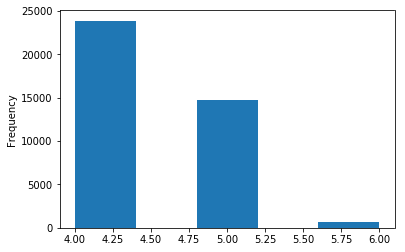

In [9]:
print(df['rdnmAdr'].apply(str.split).apply(len).unique())
df['rdnmAdr'].apply(str.split).apply(len).plot(kind='hist', bins=5)
plt.show()

In [10]:
print(df[df['rdnmAdr'].apply(str.split).apply(len) == 4].head(3)['rdnmAdr'])
print("len:", len(df[df['rdnmAdr'].apply(str.split).apply(len) == 4]['rdnmAdr']))
print("------")
print(df[df['rdnmAdr'].apply(str.split).apply(len) == 5].head(3)['rdnmAdr'])
print("len:", len(df[df['rdnmAdr'].apply(str.split).apply(len) == 5]['rdnmAdr']))
print("------")
print(df[df['rdnmAdr'].apply(str.split).apply(len) == 6].head(3)['rdnmAdr'])
print("len:", len(df[df['rdnmAdr'].apply(str.split).apply(len) == 6]['rdnmAdr']))
print("------")


1    대구광역시 달서구 상원로 46
2     경기도 동두천시 못골로 30
6      강원도 원주시 금불3길 5
Name: rdnmAdr, dtype: object
len: 23858
------
0      대구광역시 달성군 가창면 가창동로 6
3    경기도 김포시 고촌읍 장차로13번길 18
4      강원도 원주시 문막읍 원문로 1570
Name: rdnmAdr, dtype: object
len: 14670
------
223    경상남도 창원시 의창구 동읍 용정길46번길 49-1
318       충청북도 청주시 청원구 오창읍 연구단지로 21
332        충청남도 천안시 동남구 목천읍 충절로 890
Name: rdnmAdr, dtype: object
len: 649
------


In [11]:
df_Xna = df.dropna(subset=['signguNm', 'ctprvnNm', 'adongNm'])

In [12]:
print('ctprvnNm: ', df_Xna['ctprvnNm'].str.split().apply(len).unique())
print('signguNm: ', df_Xna['signguNm'].str.split().apply(len).unique())
print('adongNm: ', df_Xna['adongNm'].str.split().apply(len).unique())

ctprvnNm:  [1]
signguNm:  [1 2]
adongNm:  [1]


In [13]:
df.isnull().sum()['rdnmAdr']

0

In [23]:
df_Xna[df_Xna['rdnmAdr'].str.split().apply(lambda x: x[-3:]).apply(lambda x: not x[0].endswith(('면', '구', '시', '읍')))]

,adongCd,adongNm,bizesId,bizesNm,bldMngNo,bldMnno,bldNm,bldSlno,brchNm,ctprvnCd,...,lon,newZipcd,oldZipcd,plotSctCd,plotSctNm,rdnm,rdnmAdr,rdnmCd,signguCd,signguNm
22784,4671025000,담양읍,22563547,치킨런,4671025025101830004010477,191,백동주공아파트,NaN,NaN,46,...,126.987104,57346,517806,1,대지,전라남도 담양군 담양읍,전라남도 담양군 담양읍 191,467104658139,46710,담양군


From the result we got above, there should be only 2 variation in `rdnmAdr`. But there are 3. That signifies that the last variation, the one of length 6, originates both from `signguNm` and whatever part comes after the combination of `ctprvnNm`, `signguNm` and `adongNm`. As we can see above, the fact that we replaced all empty value(empty string) with `np.nan` does not affect the original dataframe

0     달성군
1     달서구
2    동두천시
Name: signguNm, dtype: object
-------
5     고양시 덕양구
8     청주시 청원구
9    고양시 일산동구
Name: signguNm, dtype: object


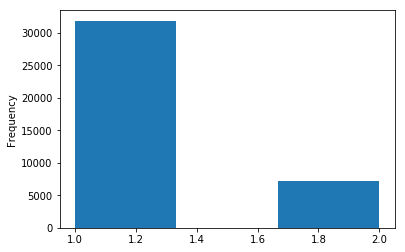

In [58]:
# Further investigation of difference in signguNm
print(df_Xna[df_Xna['signguNm'].str.split().apply(len) == 1]['signguNm'].head(3))
print('-------')
print(df_Xna[df_Xna['signguNm'].str.split().apply(len) == 2]['signguNm'].head(3))
df_Xna['signguNm'].str.split().apply(len).plot(kind='hist', bins=3)
plt.show()

In [65]:
df.isnull().sum()[['bizesNm', 'ctprvnNm', 'signguNm', 'adongNm', 'rdnmAdr', 'lon', 'lat']]
# We need to deal with np.nan values from ctprvnNm, signguNm and adongNm

bizesNm       0
ctprvnNm    193
signguNm    193
adongNm     193
rdnmAdr       0
lon           0
lat           0
dtype: int64

In [74]:
ctp = df[df['ctprvnNm'].isnull()].index
sig = df[df['signguNm'].isnull()].index
adn = df[df['adongNm'].isnull()].index
print(set(ctp) == set(sig))
print(set(sig) == set(adn))
print(set(ctp) == set(adn))
# Interestingly, all missing values exist in the same rows..
# Seems like somebody was tired of tying the address

True
True
True


In [102]:
def extract_from_rdnmAdr(row):
    if pd.isnull(row['ctprvnNm']):
        rdnm = row['rdnmAdr'].split()
        row['ctprvnNm'] = rdnm[0]
        if len(rdnm) == 4:
            row['signguNm'] = rdnm[1]
            row['adongNm'] = rdnm[2]
        else:
            row['signguNm'] = rdnm[1] + ' ' + rdnm[2]
            row['adongNm'] = rdnm[3]
    return row

In [105]:
df1 = df.apply(extract_from_rdnmAdr, axis=1)

In [108]:
df1.isnull().sum()[['ctprvnNm', 'signguNm', 'adongNm']] # seems like it's done. Let's double check

ctprvnNm    0
signguNm    0
adongNm     0
dtype: int64

In [114]:
check = df1[df1['ctprvnCd'].isnull()][['ctprvnNm', 'signguNm', 'adongNm', 'rdnmAdr']]

In [115]:
def check_it(row):
    s = '{} {} {}'.format(row['ctprvnNm'], row['signguNm'], row['adongNm'])
    return s in row['rdnmAdr']

In [118]:
check[check.apply(check_it, axis=1)==False] ## seems like all NAs from the required data is treated

,ctprvnNm,signguNm,adongNm,rdnmAdr


In [119]:
df1.to_csv('stores_NA_treated.csv', index=False)